<a href="https://www.quantrocket.com"><img alt="QuantRocket logo" src="https://www.quantrocket.com/assets/img/notebook-header-logo.png"></a><br>
<a href="https://www.quantrocket.com/disclaimer/">Disclaimer</a>

***
[Leveraged ETF Intraday Momentum Strategy](Introduction.ipynb) › Part 2: Moonshot Backtest
***

# Moonshot Strategy Code

The strategy code is provided in [trend_day.py](trend_day.py).

## Code highlights

In `prices_to_signals`, we extract the 4 PM and 2 PM price: 

```python

closes = prices.loc["Close"]
opens = prices.loc["Open"]

# Take a cross section (xs) of prices to get a specific time's price;
# the close of the 15:59 bar is the session close
session_closes = closes.xs("15:59:00", level="Time")
# the open of the 14:00 bar is the 14:00 price
afternoon_prices = opens.xs("14:00:00", level="Time")
```

Calculate the return from prior close through 2 PM:

```python

# calculate the return from yesterday's close to 14:00
prior_closes = session_closes.shift()
returns = (afternoon_prices - prior_closes) / prior_closes
```

And go long or short based on the return:

```python
        
# Go long if up more than N%, go short if down more than -N%
long_signals = returns > self.MIN_PCT_CHANGE
short_signals = returns < -self.MIN_PCT_CHANGE
```

This strategy is an example of an intraday strategy that only trades once a day. Accordingly, we utilize the convention of "reducing" the intraday DataFrame of prices to a daily DataFrame of signals through the use of the Pandas method `.xs()`, which isolates a particular time and in so doing drops the Time level from the index. See the usage guide for more details on the different conventions you can use for intraday strategies that trade once-a-day vs throughout-the-day. 


## Install strategy file

Moonshot looks for strategies inside the "moonshot" directory, so execute the following cell to "install" the strategy by moving the file to that location: 

In [1]:
# make directory if doesn't exist
!mkdir -p /codeload/moonshot

!mv trend_day.py /codeload/moonshot/

## Run backtest

Next we can run the backtest:

In [2]:
from quantrocket.moonshot import backtest
backtest("trend-day", details=True, filepath_or_buffer="trend_day.csv")

And view the performance:

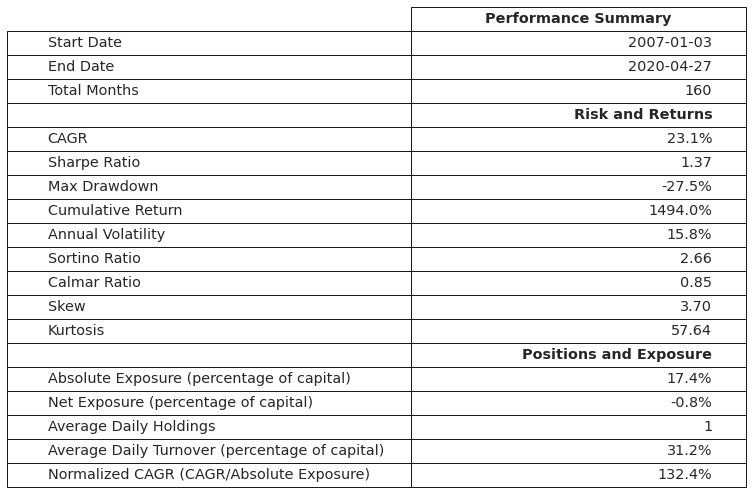

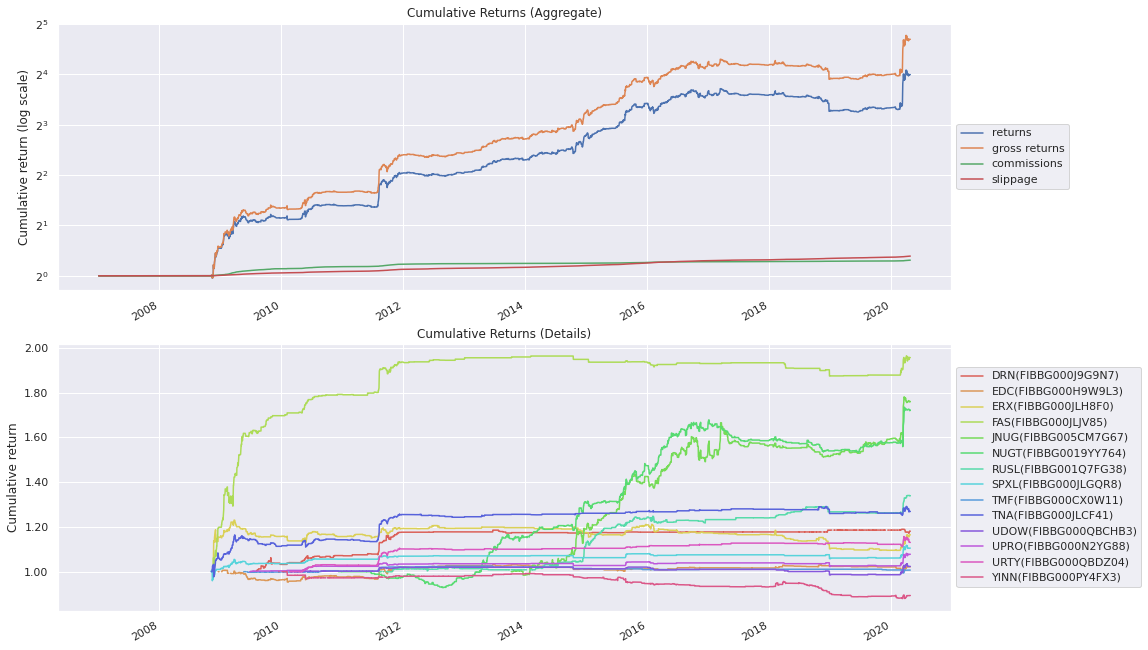

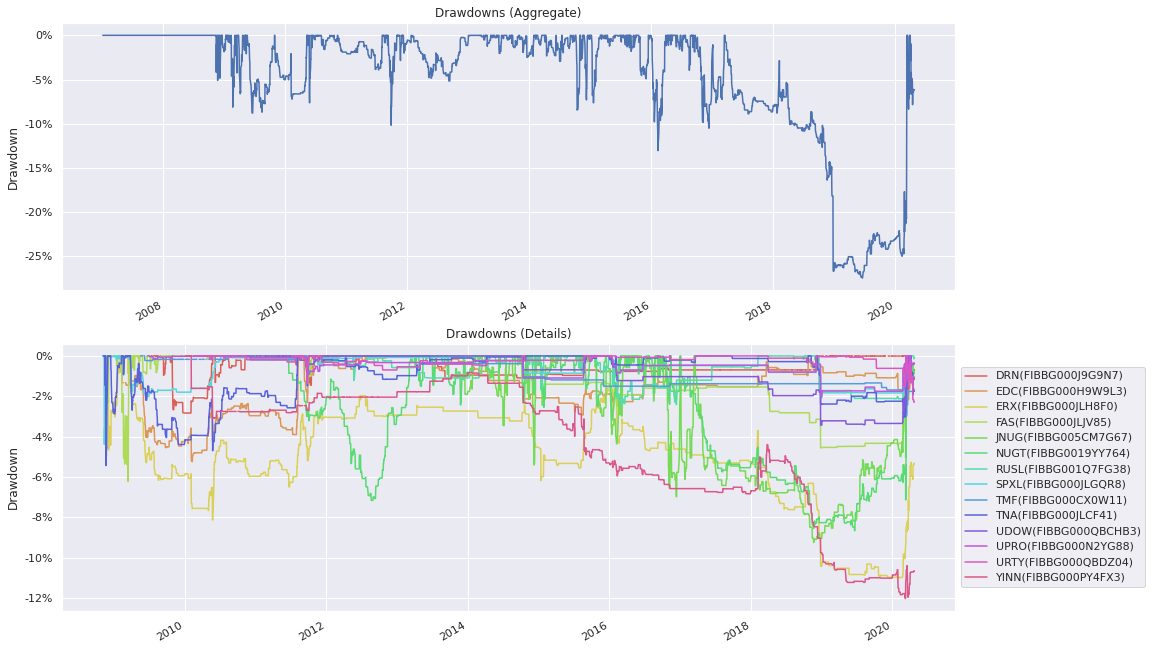

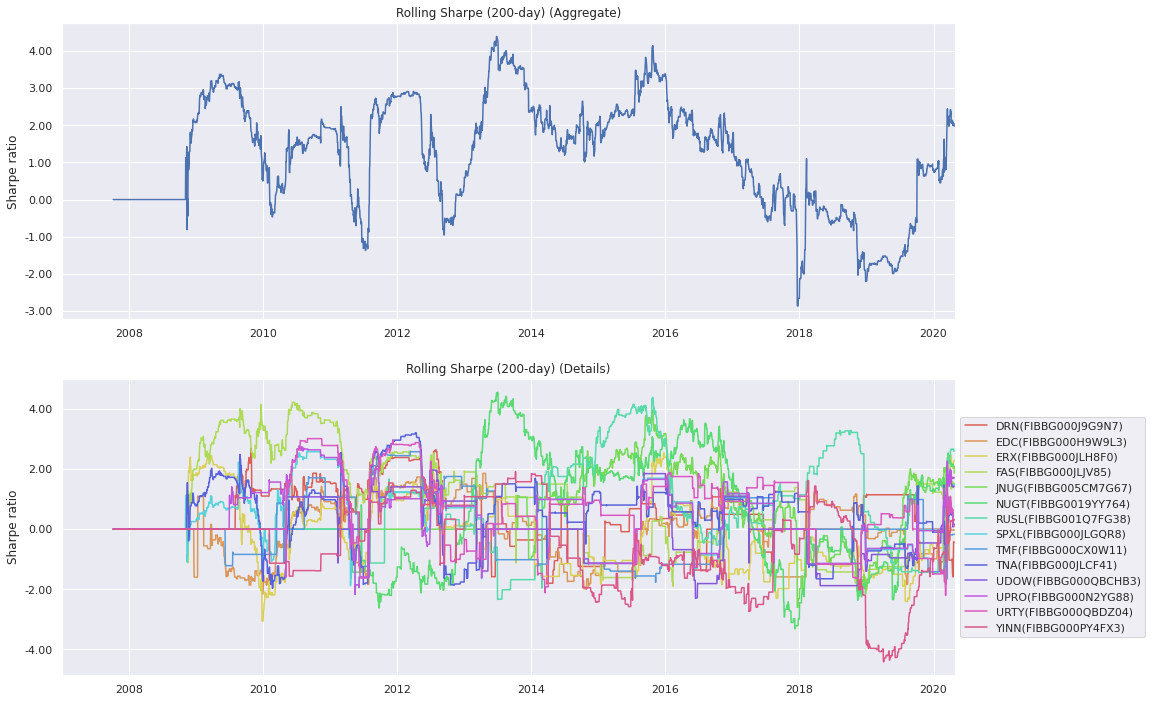

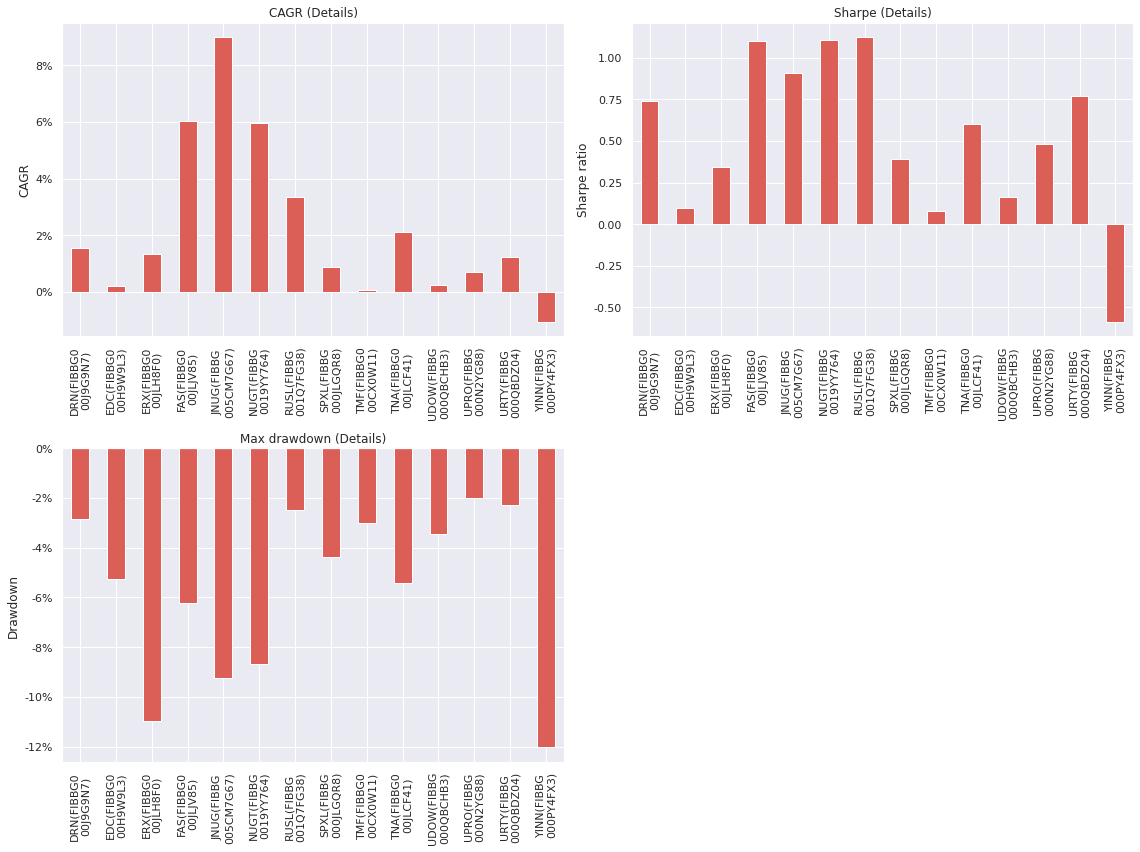

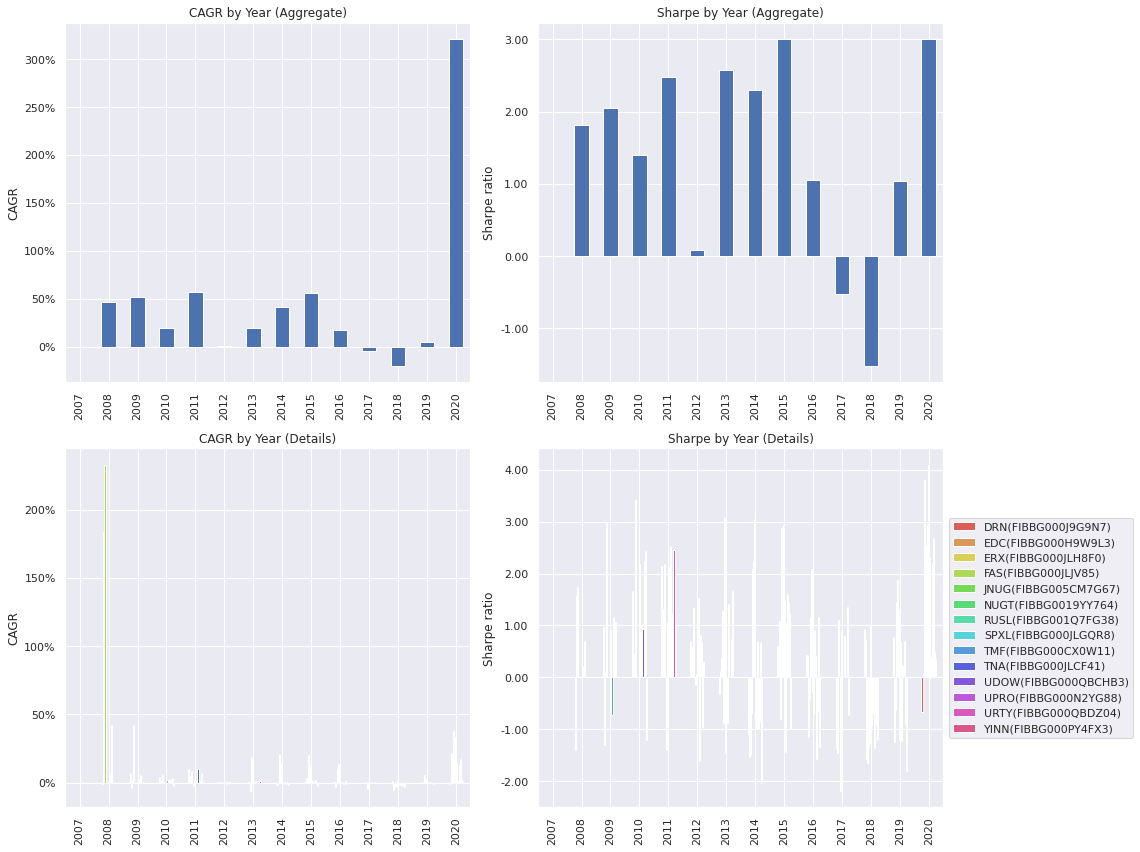

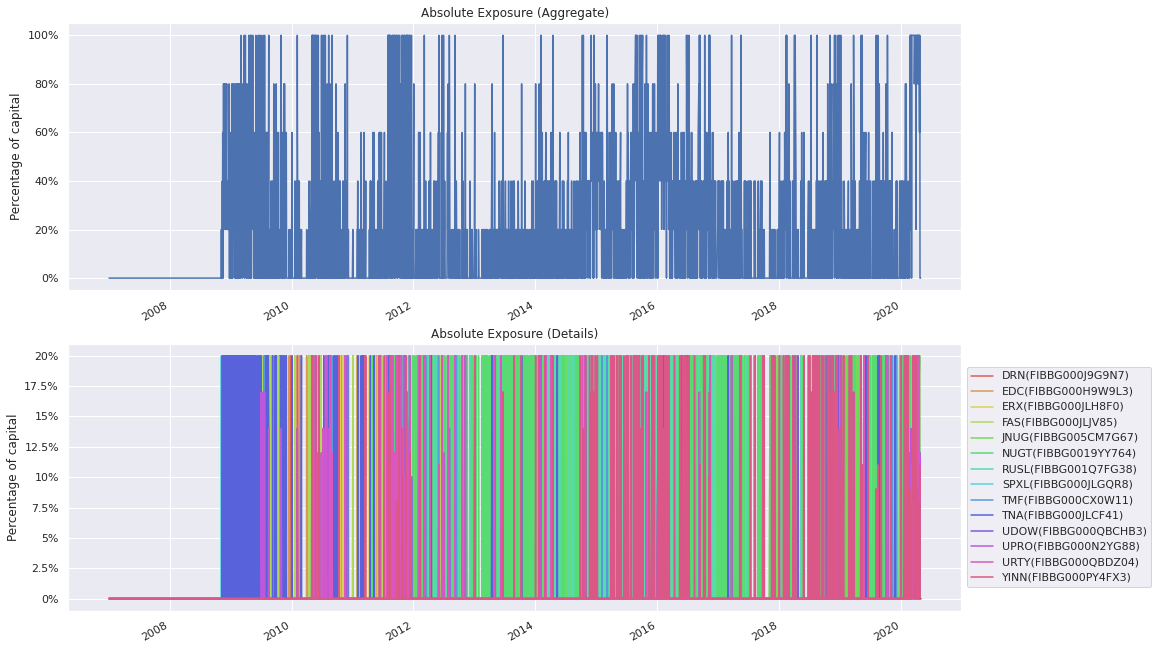

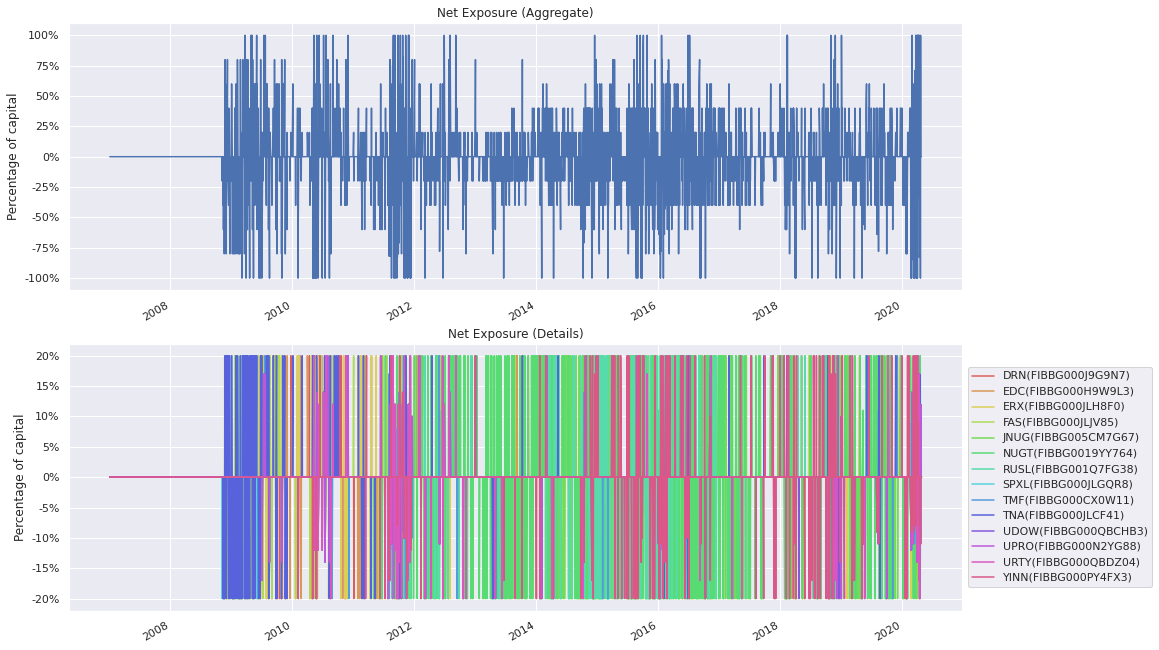

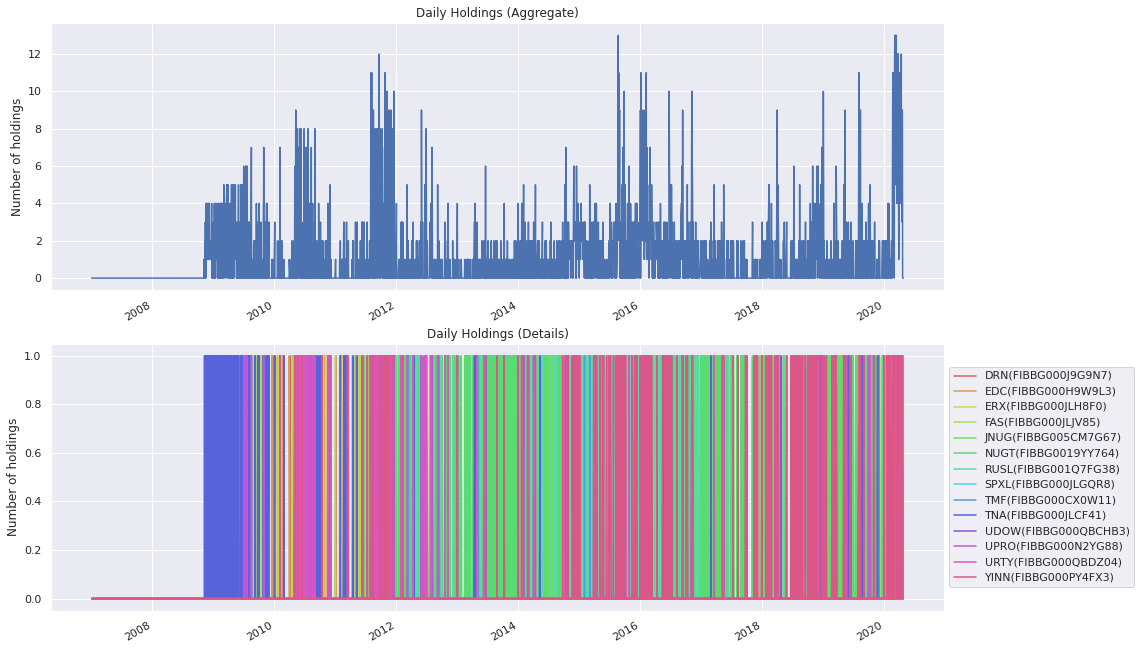

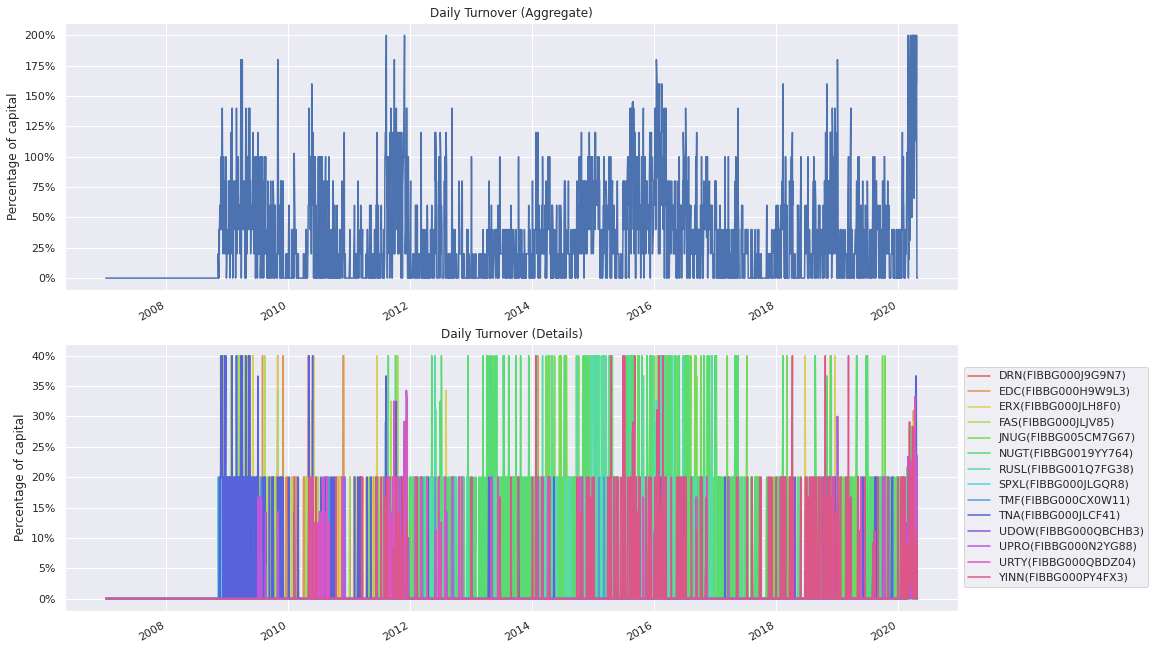

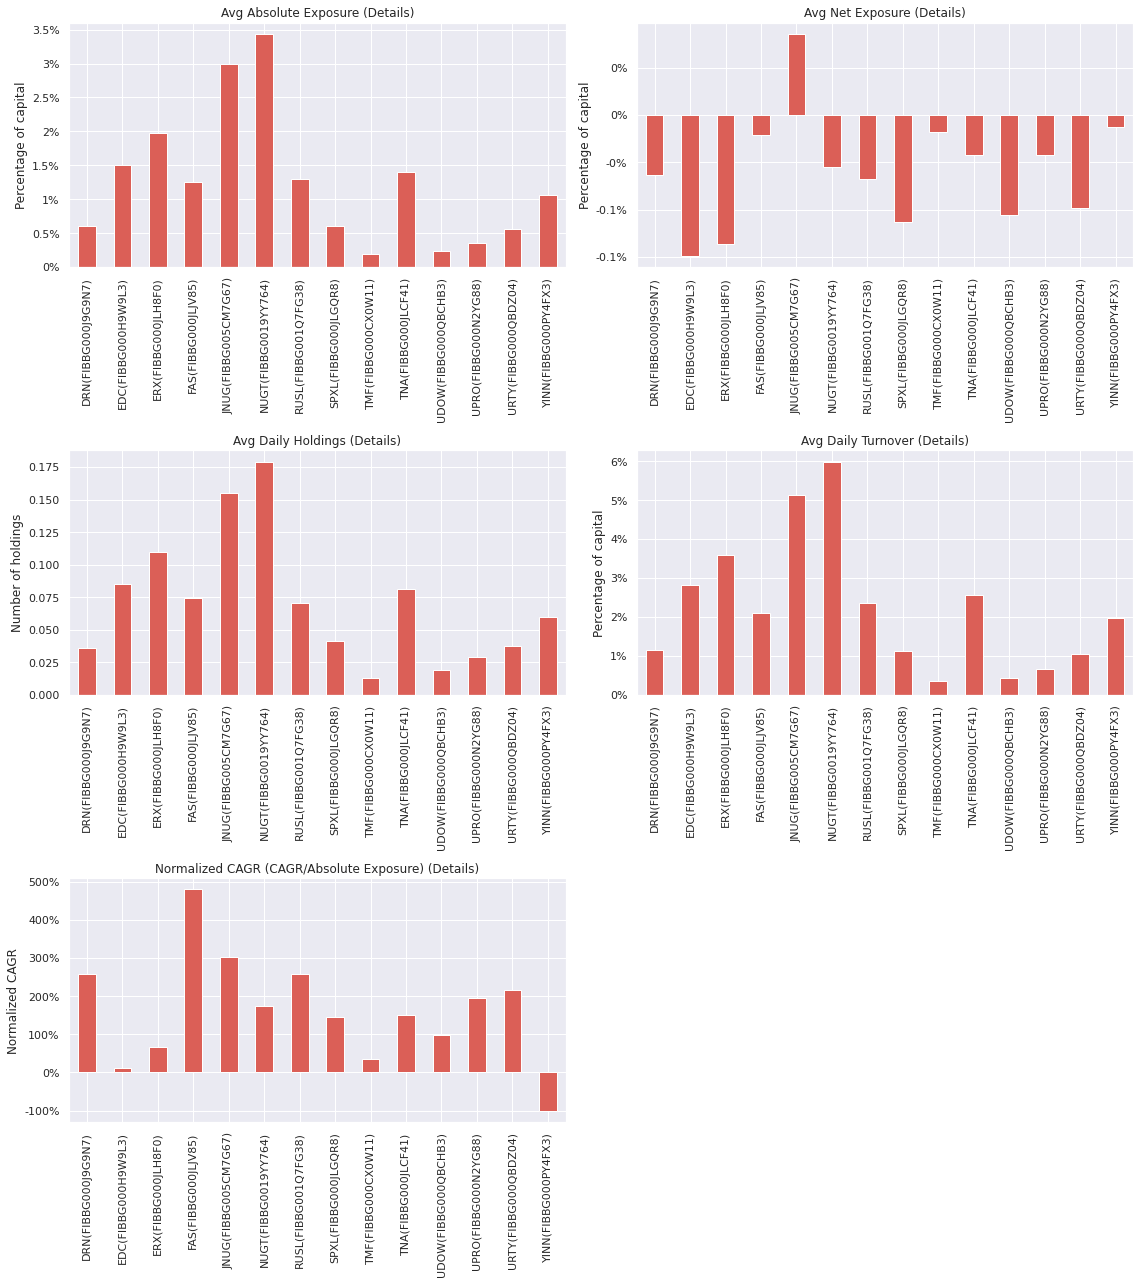

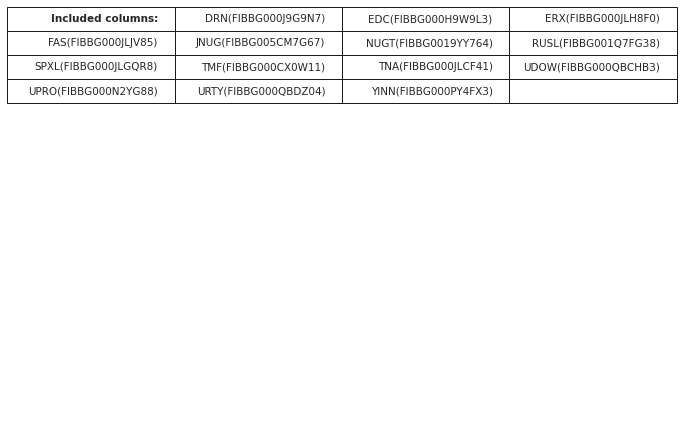

In [3]:
from moonchart import Tearsheet
Tearsheet.from_moonshot_csv("trend_day.csv")

***

## *Next Up*

Part 3: [Parameter Scans](Part3-Parameter-Scans.ipynb)